<a href="https://colab.research.google.com/github/Zahra-Mhdi/Deep-Learning-Exercises/blob/main/Session_4_CNN_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Visualize Feature Maps

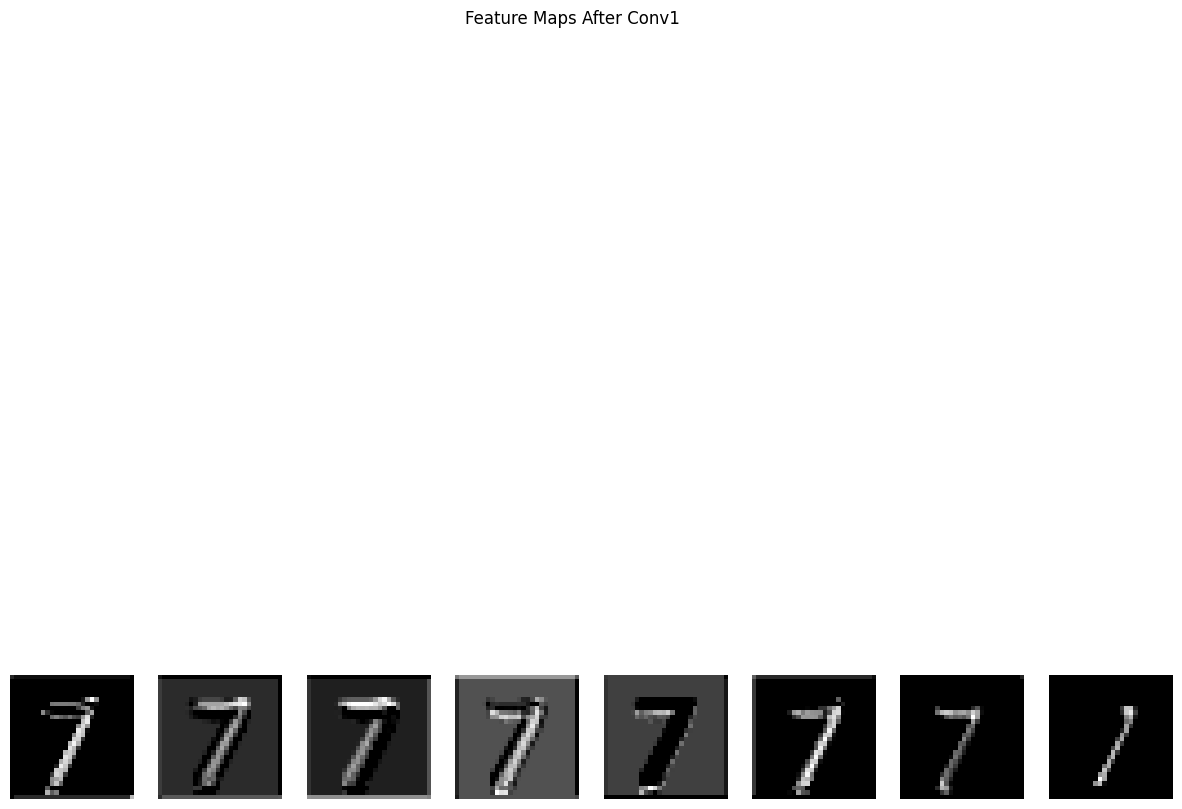

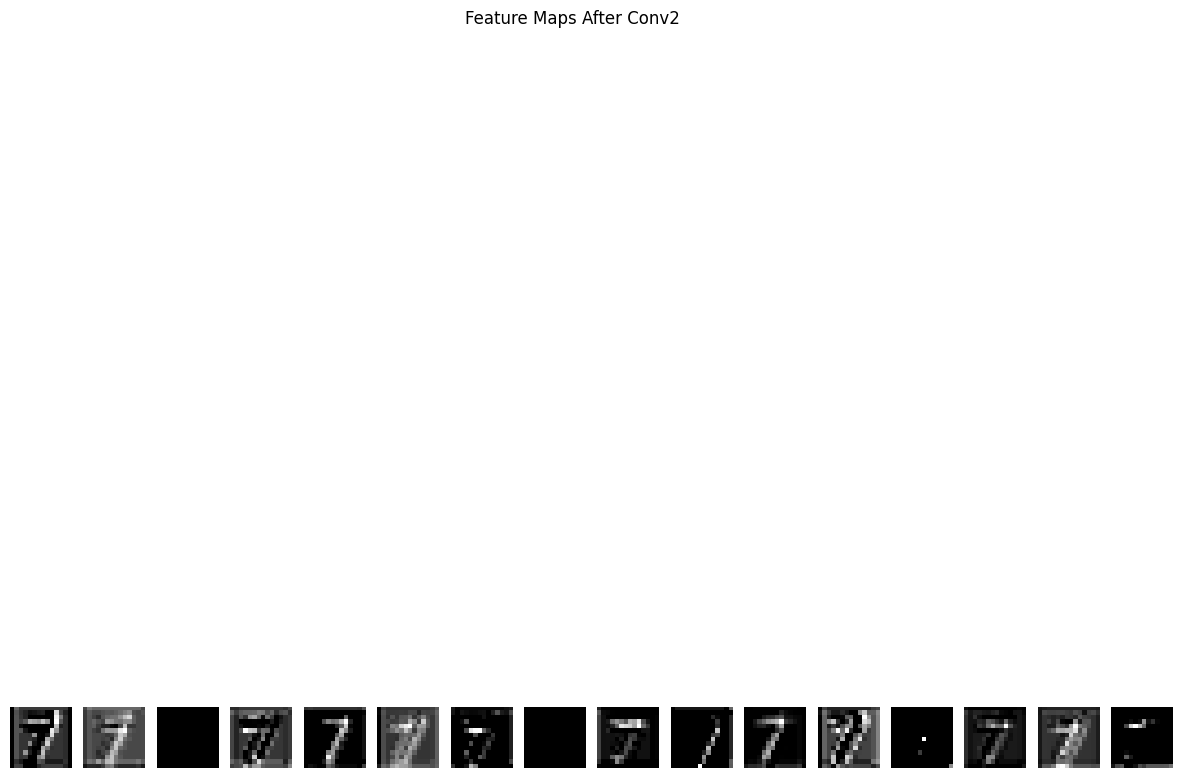

In [4]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.nn as nn

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x1 = x
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x2 = x
        x = self.pool(x)
        x = x.view(-1, 16 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x, x1, x2

model = SimpleCNN()

data_iter = iter(train_loader)
image, label = next(data_iter)

model.eval()
with torch.no_grad():
    output, feature_map1, feature_map2 = model(image)

def plot_feature_maps(feature_map, title="Feature Map"):
    num_feature_maps = feature_map.size(1)
    fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 15))
    for i in range(num_feature_maps):
        axes[i].imshow(feature_map[0, i].cpu(), cmap='gray')
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

plot_feature_maps(feature_map1, title="Feature Maps After Conv1")
plot_feature_maps(feature_map2, title="Feature Maps After Conv2")
